In [1]:
import sys
import os
sys.path.insert(0, '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/PES_plotter/PyEnergyDiagram/')
sys.path.insert(0, '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/PES_plotter')

import pes_plot
import cantera as ct
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections

/home/xu.chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/cantera/__init__.py


In [2]:
# copy the reactions from original model to BM model
def read_files(or_p, bm_p):
    gas_or = ct.Solution(or_p, 'gas')
    surf_or = ct.Interface(or_p, 'surface1', [gas_or])
    rxn_num = surf_or.n_reactions
    for i in range(rxn_num):
        gas_bm = ct.Solution(bm_p, 'gas')
        surf_bm = ct.Interface(bm_p, 'surface1', [gas_bm])
        surf_bm.reaction(i).rate = surf_or.reaction(i).rate
        os.path.exists(f'bm2or') or os.mkdir('bm2or')
        # print(1)
        os.path.exists(f'bm2or/rxn{i}') or os.mkdir(f'bm2or/rxn{i}')
        surf_bm.write_yaml(f'bm2or/rxn{i}/cantera.yaml')
        shutil.copy('simulation.py', f'bm2or/rxn{i}/simulation.py')

In [3]:
or_p = '/work/westgroup/chao/bm_project/base_original/binding_energies/10.0_c-5.75o-3.25/cantera.yaml'
bm_p = '/work/westgroup/chao/bm_project/base_bm/binding_energies/10.0_c-5.75o-3.25/cantera.yaml'
# read_files(or_p, bm_p)
# gas_or = ct.Solution(or_p, 'gas')
# surf_or = ct.Interface(or_p, 'surface1', [gas_or])
# gas_bm = ct.Solution(bm_p, 'gas')
# surf_bm = ct.Interface(bm_p, 'surface1', [gas_bm])

In [4]:
gas_or = ct.Solution(or_p, 'gas')
surf_or = ct.Interface(or_p, 'surface1', [gas_or])
gas_or.species()

/home/xu.chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: NasaPoly2::validate: 
For species CH3O_X(45), discontinuity in cp/R detected at Tmid = 857.63
	Value computed using low-temperature polynomial:  10.615319744584205
	Value computed using high-temperature polynomial: 10.773680323194302

  
/home/xu.chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: NasaPoly2::validate: 
For species CH3O_X(45), discontinuity in h/RT detected at Tmid = 857.63
	Value computed using low-temperature polynomial:  -12.885994823524513
	Value computed using high-temperature polynomial: -12.897902903752454

  
/home/xu.chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: NasaPoly2::validate: 
For species CH4OX(43), discontinuity in cp/R detected at Tmid = 850.41
	Value computed using low-temperature polynomial:  11.305535344771027
	Value computed using high-temperature polynomial:

[<Species Ar>,
 <Species Ne>,
 <Species N2>,
 <Species CH4(2)>,
 <Species O2(3)>,
 <Species CO2(4)>,
 <Species H2O(5)>,
 <Species H2(6)>,
 <Species CO(7)>,
 <Species C2H6(8)>,
 <Species CH2O(9)>,
 <Species CH3(10)>,
 <Species C3H8(11)>,
 <Species H(12)>,
 <Species C2H5(13)>,
 <Species CH3OH(14)>,
 <Species HCO(15)>,
 <Species CH3CHO(16)>,
 <Species OH(17)>,
 <Species C2H4(18)>,
 <Species CH3OO(20)>,
 <Species C2H4(62)>]

In [5]:
benchmark_p = '/work/westgroup/chao/bm_project/base_bm/binding_energies/10.0_c-5.75o-3.25/gas_profiles/gas_out0.6.csv'
df_benchmark = pd.read_csv(benchmark_p)

In [6]:
ch4_benchmark_1045 = df_benchmark.iloc[3, 1:][1045]
diffs = []
for i in range(surf_or.n_reactions):
    p_target = f'bm2or/rxn{i}/gas_profiles/gas_out0.6.csv'
    df_target = pd.read_csv(p_target)
    ch4_bm_1045 = df_target.iloc[3, 1:][1045]
    diff = abs((ch4_bm_1045 - ch4_benchmark_1045) / ch4_benchmark_1045)
    diffs.append(diff)
    if diff > 0.5:
        print(i)
        print(surf_or.reaction(i))

In [12]:
top_10_diffs = np.argsort(diffs)[-10:]
for i in top_10_diffs:
    print(diffs[i])
    print(i)
    print(surf_or.reaction(i))

0.004346746739452561
22
COX(23) + HX(21) <=> CX(29) + OHX(31)
0.005106624712993433
10
COX(23) + HX(21) <=> CHX(28) + OX(25)
0.007950162454219712
70
CH4X(24) + OX(25) <=> CH3O_X(45) + HX(21)
0.019366230748743933
9
CHX(28) + HX(21) <=> CH2X(26) + X(1)
0.01963897504668506
38
CH2O(9) + 2 X(1) <=> CH2X(26) + OX(25)
0.06743486281953973
16
CO2X(22) + HX(21) <=> COX(23) + OHX(31)
0.0907791695467897
34
CO2(4) + 2 X(1) <=> COX(23) + OX(25)
0.13296328935855753
35
H2O(5) + 2 X(1) <=> HX(21) + OHX(31)
0.19507102053200895
36
C2H6(8) + 2 X(1) <=> 2 CH3X(27)
0.20434080119928508
39
CH3OH(14) + 2 X(1) <=> CH3X(27) + OHX(31)


### The above cells narrow the reaction down to ten, and I went back to check the figures at  C/O=0.6, it turned out reaction 36 and 39 changes the profile significantly, so I will look into these two reactions

In [4]:
gas_bm = ct.Solution(bm_p, 'gas')
surf_bm = ct.Interface(bm_p, 'surface1', [gas_bm])

/home/xu.chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: NasaPoly2::validate: 
For species CH3O_X(45), discontinuity in cp/R detected at Tmid = 857.63
	Value computed using low-temperature polynomial:  10.615319744584205
	Value computed using high-temperature polynomial: 10.773680323194302

  
/home/xu.chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: NasaPoly2::validate: 
For species CH3O_X(45), discontinuity in h/RT detected at Tmid = 857.63
	Value computed using low-temperature polynomial:  -12.885994823524513
	Value computed using high-temperature polynomial: -12.897902903752454

  
/home/xu.chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: NasaPoly2::validate: 
For species CH4OX(43), discontinuity in cp/R detected at Tmid = 850.41
	Value computed using low-temperature polynomial:  11.305535344771027
	Value computed using high-temperature polynomial:

In [5]:
# check the rate of progress
or_rp = '/work/westgroup/chao/bm_project/base_original/binding_energies/10.0_c-5.75o-3.25/rates_of_progress/net_rates_0.6.csv'
bm_rp = '/work/westgroup/chao/bm_project/base_bm/binding_energies/10.0_c-5.75o-3.25/rates_of_progress/net_rates_0.6.csv'
df_or_rp = pd.read_csv('/work/westgroup/chao/bm_project/base_original/binding_energies/10.0_c-5.75o-3.25/rates_of_progress/net_rates_0.6.csv')
df_bm_rp = pd.read_csv('/work/westgroup/chao/bm_project/base_bm/binding_energies/10.0_c-5.75o-3.25/rates_of_progress/net_rates_0.6.csv')

In [28]:
df_or_rp.head(5)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,97,98,99,100,101,102,103,104,105,106
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
print(df_or_rp.iloc[1045,37], df_bm_rp.iloc[1045,37])

-7.98043521079244e-06 2.5963538300451463e-07


In [16]:
print(df_or_rp.iloc[1045,40], df_bm_rp.iloc[1045,40])

-0.0032422523725917727 5.656552189264392e-08


In [18]:
# check the rate of progress
or_rp = '/work/westgroup/chao/bm_project/base_original/binding_energies/10.0_c-5.75o-3.25/rates_of_progress/net_rates_0.6.csv'
bm_rp = '/work/westgroup/chao/bm_project/base_original/binding_energies/10.0_c-5.75o-3.25/bm2or/rxn39/rates_of_progress/net_rates_0.6.csv'
df_or_rp = pd.read_csv(or_rp)
df_bm_rp = pd.read_csv(bm_rp)
print(df_or_rp.iloc[1045,40], df_bm_rp.iloc[1045,40])

-0.0032422523725917727 -0.0029259509157285113


In [6]:
# read the reaction net of progress
df = pd.read_csv('rxnpath/net_rates_0.6_1045.csv')
net_progress = np.array(df.iloc[0:,1])

In [17]:
def get_rxns(rxnpath, surface):
    rxn_path_ids = []
    for rxns in rxnpath:
        ids = []
        for i , v in enumerate(surface.reactions()):
            if rxns[0] in v.reactants.keys() and rxns[1] in v.products.keys():
                # print(v)
                # print(pes_plot_1.surf.forward_rate_constants[i])
                # rxns.append(pes_plot_1.surf.forward_rate_constants[i])
                ids.append(i)
            elif rxns[0] in v.products.keys() and rxns[1] in v.reactants.keys():
                # print(v)
                # print(pes_plot_1.surf.reverse_rate_constants[i])
                # rxns.append(pes_plot_1.surf.reverse_rate_constants[i])
                ids.append(i)
        rxn_path_ids.append(ids)

    for i in range(len(rxnpath)):
        print(rxnpath[i])
        reactions = []
        rates = []
        for j in rxn_path_ids[i]:
            print(surface.reaction(j))
            # reactions.append(pes_plot_1.surf.reaction(j))
            reactions.append(str(j))
            rates.append(net_progress[j])

        # Create a bar chart using matplotlib
        # print(reactions)
        # print(rates)
        # print(np.log(np.array(rates)))
        plt.figure(figsize=(10, 6))
        plt.bar(reactions, np.log10(np.abs(np.array(rates))))

        # Add labels and title
        plt.xlabel('Reactions')
        plt.ylabel('Net rate of progress')
        # plt.title('Bar Chart Example')
        plt.tight_layout()
        # Display the chart
        plt.show()
    
    return rxn_path_ids

['CH4(2)', 'CH4X(24)']
CH4(2) + X(1) <=> CH4X(24)


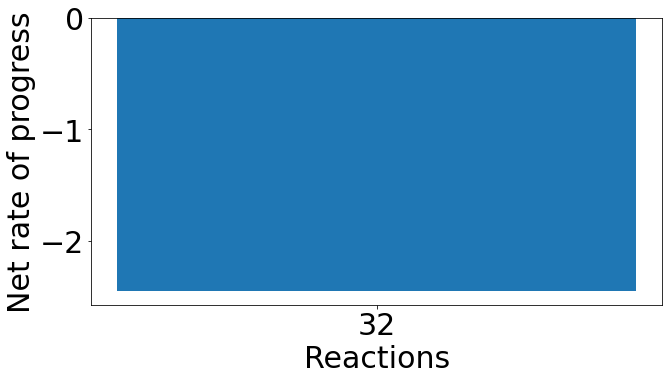

['CH4X(24)', 'CH3X(27)']
CH4X(24) + X(1) <=> CH3X(27) + HX(21)
CH3X(27) + H2X(30) <=> CH4X(24) + HX(21)
CH4X(24) + COX(23) <=> CH3X(27) + CHOX(33)
CH4X(24) + OX(25) <=> CH3X(27) + OHX(31)
CH2X(26) + CH4X(24) <=> 2 CH3X(27)
CH4X(24) + CHX(28) <=> CH2X(26) + CH3X(27)
CH4X(24) + CX(29) <=> CH3X(27) + CHX(28)
CH4X(24) + OHX(31) <=> CH3X(27) + H2OX(32)
CH3X(27) + H2OX(32) <=> CH4X(24) + OHX(31)
CH2O_X(46) + CH3X(27) <=> CH4X(24) + CHOX(33)
CH2O_X(46) + CH4X(24) <=> CH3O_X(45) + CH3X(27)


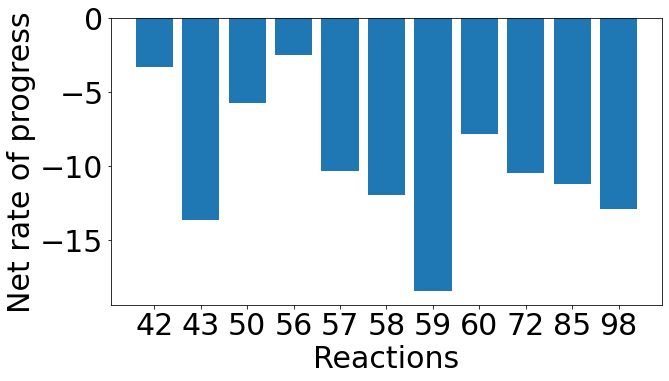

['CH3X(27)', 'CH2X(26)']
CH2X(26) + HX(21) <=> CH3X(27) + X(1)
CH3X(27) + OX(25) <=> CH2X(26) + OHX(31)
CH2X(26) + H2OX(32) <=> CH3X(27) + OHX(31)
CH2X(26) + H2X(30) <=> CH3X(27) + HX(21)
CH2X(26) + CHOX(33) <=> CH3X(27) + COX(23)
CH2X(26) + CH4X(24) <=> 2 CH3X(27)
2 CH2X(26) <=> CH3X(27) + CHX(28)
CH3X(27) + CX(29) <=> CH2X(26) + CHX(28)
CH2O_X(46) + CH2X(26) <=> CH3X(27) + CHOX(33)
CH2O_X(46) + CH3X(27) <=> CH2X(26) + CH3O_X(45)


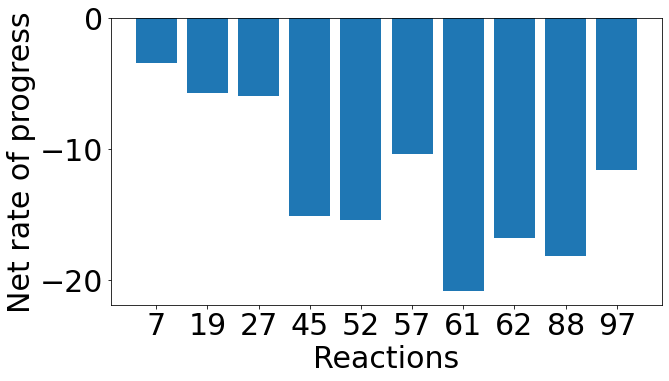

['CH2X(26)', 'CHX(28)']
CHX(28) + HX(21) <=> CH2X(26) + X(1)
CHX(28) + OHX(31) <=> CH2X(26) + OX(25)
CHX(28) + H2OX(32) <=> CH2X(26) + OHX(31)
CHX(28) + H2X(30) <=> CH2X(26) + HX(21)
CHOX(33) + CHX(28) <=> CH2X(26) + COX(23)
CH4X(24) + CHX(28) <=> CH2X(26) + CH3X(27)
2 CH2X(26) <=> CH3X(27) + CHX(28)
CH2X(26) + CX(29) <=> 2 CHX(28)
CH2O_X(46) + CHX(28) <=> CH2X(26) + CHOX(33)
CH2O_X(46) + CH2X(26) <=> CH3O_X(45) + CHX(28)


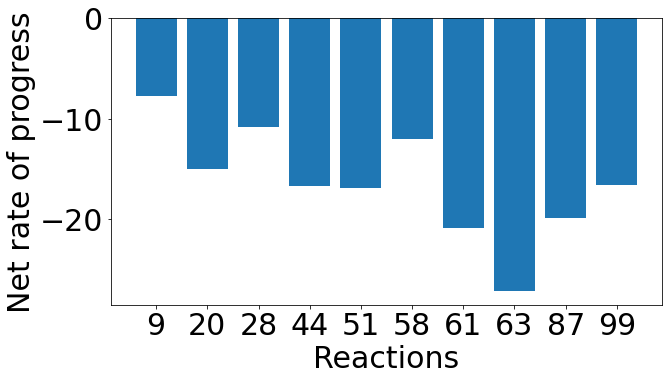

['CHX(28)', 'CX(29)']
CHX(28) + X(1) <=> CX(29) + HX(21)
CX(29) + OHX(31) <=> CHX(28) + OX(25)
CX(29) + H2OX(32) <=> CHX(28) + OHX(31)
CX(29) + H2X(30) <=> CHX(28) + HX(21)
CHOX(33) + CX(29) <=> CHX(28) + COX(23)
CH4X(24) + CX(29) <=> CH3X(27) + CHX(28)
CH3X(27) + CX(29) <=> CH2X(26) + CHX(28)
CH2X(26) + CX(29) <=> 2 CHX(28)
CH2O_X(46) + CX(29) <=> CHOX(33) + CHX(28)
CH2O_X(46) + CHX(28) <=> CH3O_X(45) + CX(29)


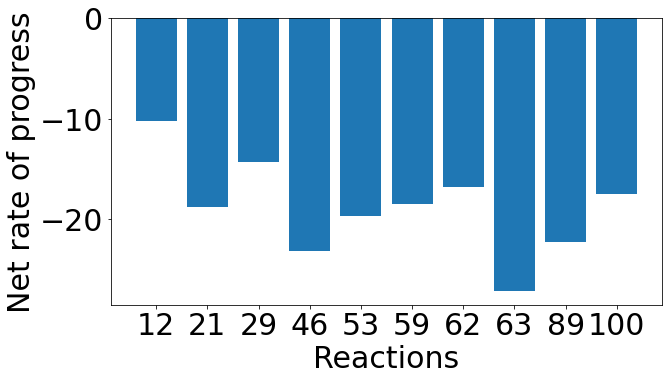

['CX(29)', 'COX(23)']
CX(29) + OX(25) <=> COX(23) + X(1)
2 COX(23) <=> CO2X(22) + CX(29)
COX(23) + HX(21) <=> CX(29) + OHX(31)
CHOX(33) + CX(29) <=> CHX(28) + COX(23)


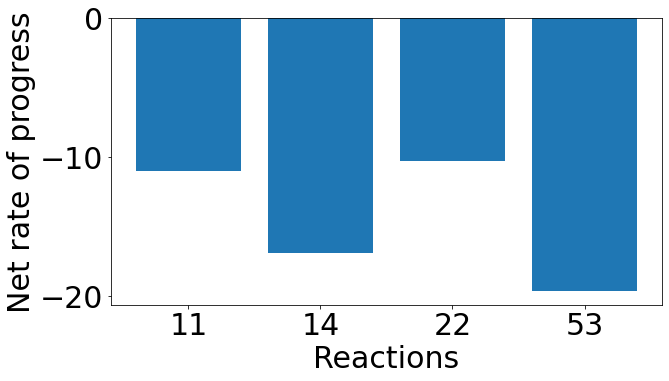

[[32],
 [42, 43, 50, 56, 57, 58, 59, 60, 72, 85, 98],
 [7, 19, 27, 45, 52, 57, 61, 62, 88, 97],
 [9, 20, 28, 44, 51, 58, 61, 63, 87, 99],
 [12, 21, 29, 46, 53, 59, 62, 63, 89, 100],
 [11, 14, 22, 53]]

In [18]:
get_rxns(rxnpath, surf_bm)

['CH4(2)', 'CH4X(24)']
CH4(2) + X(1) <=> CH4X(24)


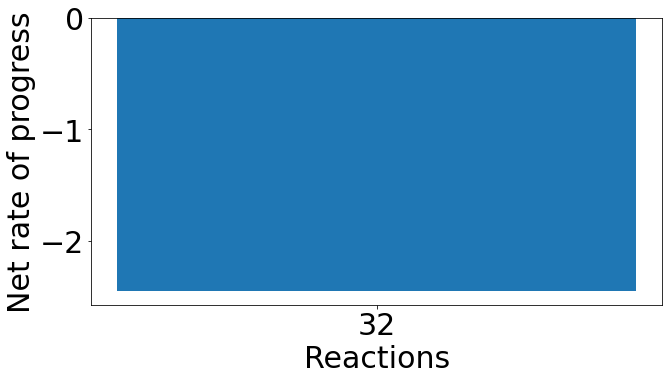

['CH4X(24)', 'CH3X(27)']
CH4X(24) + X(1) <=> CH3X(27) + HX(21)
CH3X(27) + H2X(30) <=> CH4X(24) + HX(21)
CH4X(24) + COX(23) <=> CH3X(27) + CHOX(33)
CH4X(24) + OX(25) <=> CH3X(27) + OHX(31)
CH2X(26) + CH4X(24) <=> 2 CH3X(27)
CH4X(24) + CHX(28) <=> CH2X(26) + CH3X(27)
CH4X(24) + CX(29) <=> CH3X(27) + CHX(28)
CH4X(24) + OHX(31) <=> CH3X(27) + H2OX(32)
CH3X(27) + H2OX(32) <=> CH4X(24) + OHX(31)
CH2O_X(46) + CH3X(27) <=> CH4X(24) + CHOX(33)
CH2O_X(46) + CH4X(24) <=> CH3O_X(45) + CH3X(27)


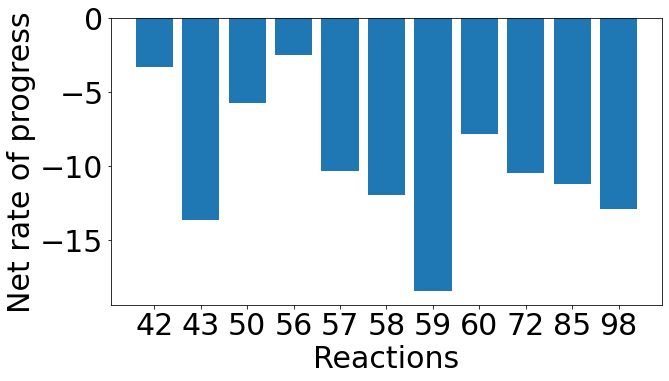

['CH3X(27)', 'CH3OH(14)']
CH3OH(14) + 2 X(1) <=> CH3X(27) + OHX(31)


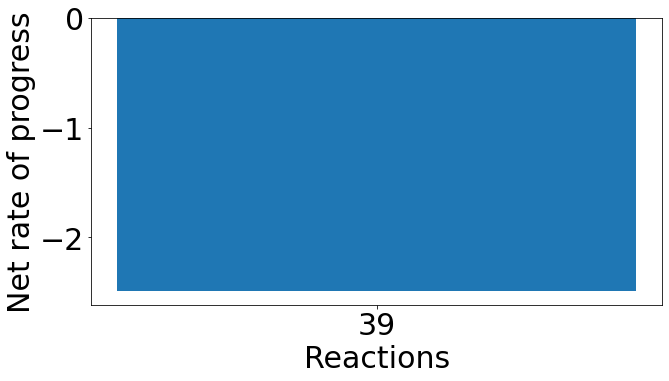

[[32], [42, 43, 50, 56, 57, 58, 59, 60, 72, 85, 98], [39]]

In [19]:
rxnpath = [['CH4(2)', 'CH4X(24)'], ['CH4X(24)', 'CH3X(27)'], ['CH3X(27)', 'CH2X(26)'], ['CH2X(26)', 'CHX(28)'], ['CHX(28)', 'CX(29)'], ['CX(29)', 'COX(23)']]
rxnpath_bm = [['CH4(2)', 'CH4X(24)'], ['CH4X(24)', 'CH3X(27)'], ['CH3X(27)', 'CH3OH(14)']]
# get_rxns(rxnpath, surf_bm)
get_rxns(rxnpath_bm, surf_bm)

In [2]:
yml_path = '/work/westgroup/chao/bm_project/base_original/binding_energies/10.0_c-5.75o-3.25/cantera.yaml'
pes_plot_1 = pes_plot.pes_plot(yml_path, 1000, ct.one_atm)
pes_plot_1.surf.TP = 1000,ct.one_atm

/work/westgroup/chao/sketches/cpox_sim/bm_models_final/PES_plotter/pes_plot.py:214: UserWarning: NasaPoly2::validate: 
For species CH3O_X(45), discontinuity in cp/R detected at Tmid = 857.63
	Value computed using low-temperature polynomial:  10.615319744584205
	Value computed using high-temperature polynomial: 10.773680323194302

  self.surf = ct.Interface(yaml_file,"surface1", [self.gas])
/work/westgroup/chao/sketches/cpox_sim/bm_models_final/PES_plotter/pes_plot.py:214: UserWarning: NasaPoly2::validate: 
For species CH3O_X(45), discontinuity in h/RT detected at Tmid = 857.63
	Value computed using low-temperature polynomial:  -12.885994823524513
	Value computed using high-temperature polynomial: -12.897902903752454

  self.surf = ct.Interface(yaml_file,"surface1", [self.gas])
/work/westgroup/chao/sketches/cpox_sim/bm_models_final/PES_plotter/pes_plot.py:214: UserWarning: NasaPoly2::validate: 
For species CH4OX(43), discontinuity in cp/R detected at Tmid = 850.41
	Value computed using 

32 CH4(2) + X(1) <=> CH4X(24)
56 CH4X(24) + OX(25) <=> CH3X(27) + OHX(31)
39 CH3OH(14) + 2 X(1) <=> CH3X(27) + OHX(31) swapped
flipped equation:  CH3OH(14) + 2 X(1) <=> CH3X(27) + OHX(31) CH3X(27) + OHX(31) <=> CH3OH(14) + 2 X(1)
flipped equation:  CH3OH(14) + 2 X(1) <=> CH3X(27) + OHX(31) CH3X(27) + OHX(31) <=> CH3OH(14) + 2 X(1)
flipped equation:  CH3OH(14) + 2 X(1) <=> CH3X(27) + OHX(31) CH3X(27) + OHX(31) <=> CH3OH(14) + 2 X(1)
flipped equation:  CH3OH(14) + 2 X(1) <=> CH3X(27) + OHX(31) CH3X(27) + OHX(31) <=> CH3OH(14) + 2 X(1)
flipped equation:  CH3OH(14) + 2 X(1) <=> CH3X(27) + OHX(31) CH3X(27) + OHX(31) <=> CH3OH(14) + 2 X(1)
flipped equation:  CH3OH(14) + 2 X(1) <=> CH3X(27) + OHX(31) CH3X(27) + OHX(31) <=> CH3OH(14) + 2 X(1)
flipped equation:  CH3OH(14) + 2 X(1) <=> CH3X(27) + OHX(31) CH3X(27) + OHX(31) <=> CH3OH(14) + 2 X(1)
flipped equation:  CH3OH(14) + 2 X(1) <=> CH3X(27) + OHX(31) CH3X(27) + OHX(31) <=> CH3OH(14) + 2 X(1)
flipped equation:  CH3OH(14) + 2 X(1) <=> CH3X(27

/home/xu.chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: NasaPoly2::validate: 
For species CH3O_X(45), discontinuity in cp/R detected at Tmid = 857.63
	Value computed using low-temperature polynomial:  10.615319744584205
	Value computed using high-temperature polynomial: 10.773680323194302

/home/xu.chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: NasaPoly2::validate: 
For species CH3O_X(45), discontinuity in h/RT detected at Tmid = 857.63
	Value computed using low-temperature polynomial:  -16.685067677440152
	Value computed using high-temperature polynomial: -16.696975757668092

/home/xu.chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: NasaPoly2::validate: 
For species CH4OX(43), discontinuity in cp/R detected at Tmid = 850.41
	Value computed using low-temperature polynomial:  11.305535344771027
	Value computed using high-temperature polynomial: 11

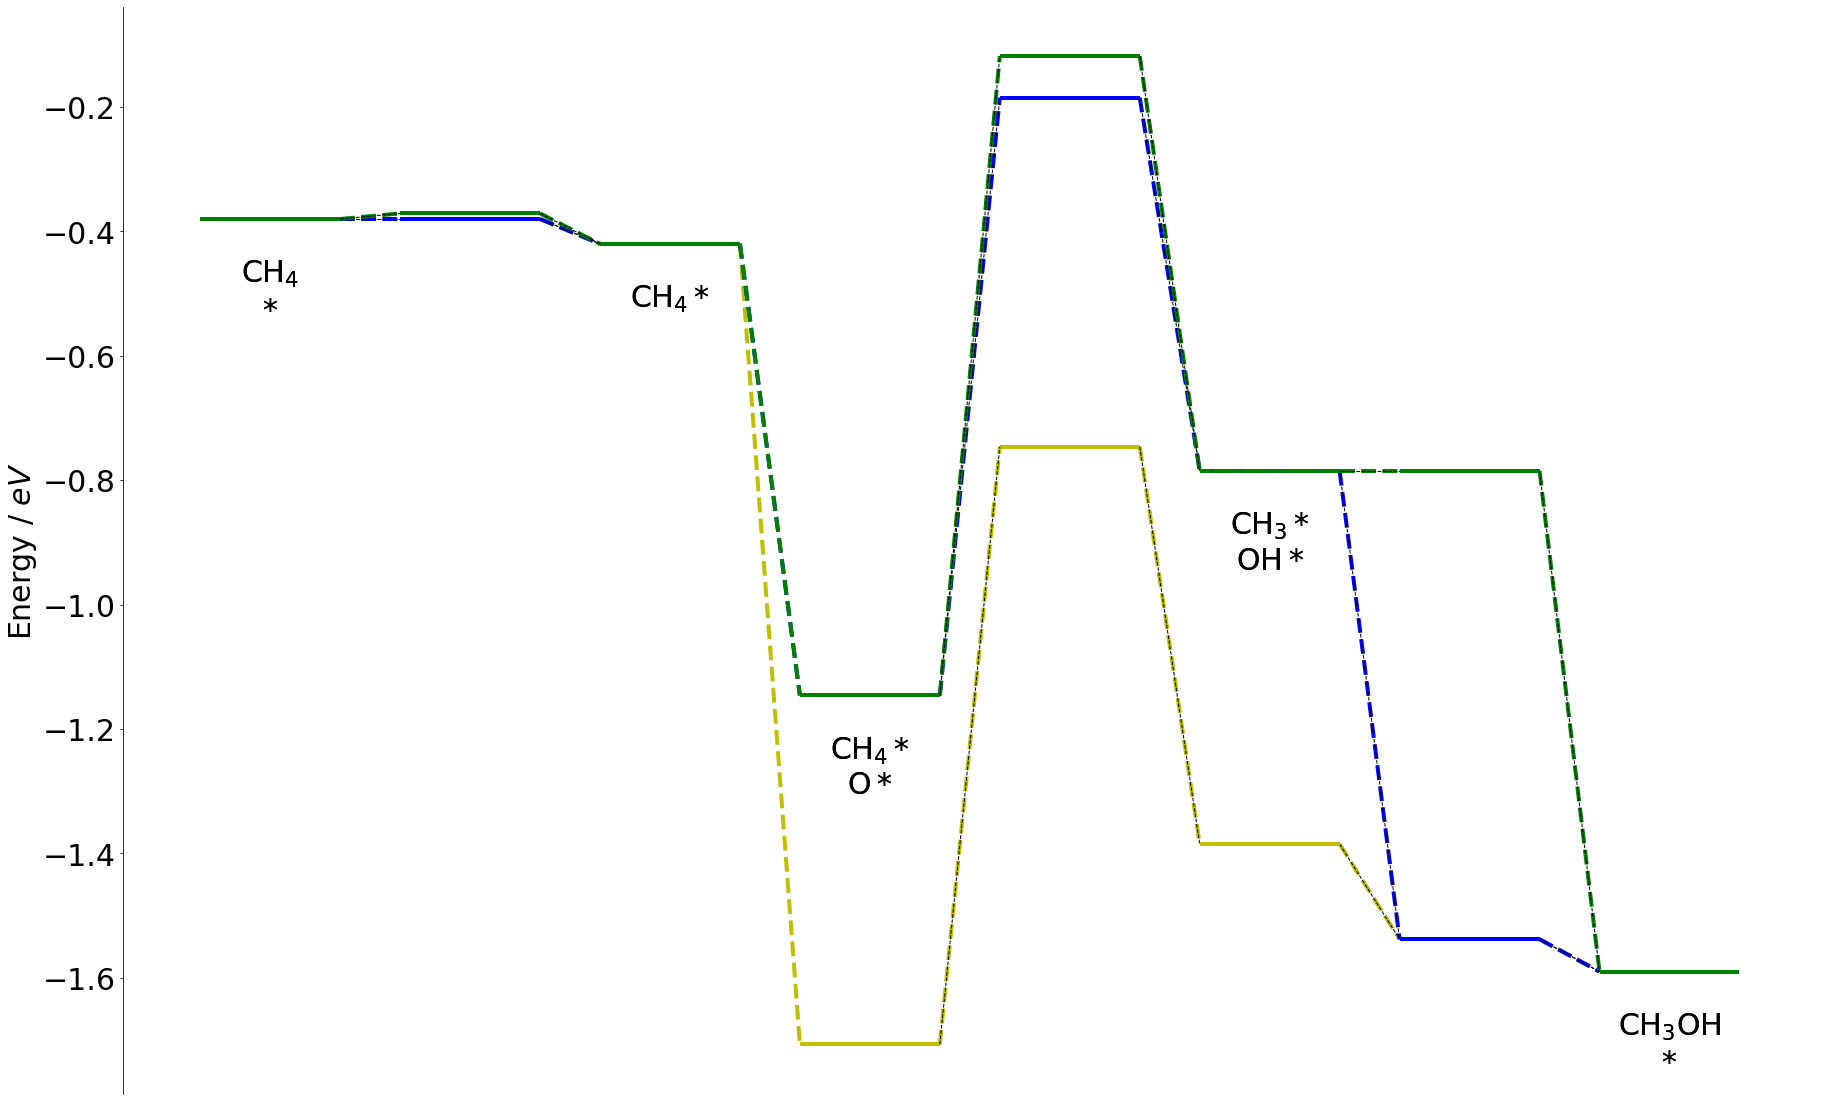

In [3]:
sp_path = [
           # [['CH4(2)', 'OHX(31)', 'X(1)'], ['CH3X(27)', 'H2OX(32)']],
           # [['CH4X(24)', 'OX(25)'], ['CH3X(27)', 'OHX(31)']],
           [['CH4(2)', 'X(1)'], ['CH4X(24)']],
           [['CH4X(24)', 'OX(25)'], ['CH3X(27)', 'OHX(31)']],
           [['CH3X(27)', 'OHX(31)'], ['CH3OH(14)', 'X(1)', 'X(1)']],
          ]


def search_rxn(reactants, products, rxn_list):
    for i, rxn in enumerate(rxn_list):
        count = collections.Counter
        if count(reactants) == count(rxn.reactants) and count(products) == count(rxn.products):
            print(i, rxn)
            return i, False
        elif count(reactants) == count(rxn.products) and count(products) == count(rxn.reactants):
            print(i, rxn, 'swapped')
            return i, True
    raise ValueError('not found!')

rxn_path = []
for combo in sp_path:
    rxn_idx, swapped = search_rxn(combo[0], combo[1], pes_plot_1.surf.reactions())
    if type(rxn_idx) == int:
        rxn_path.append((rxn_idx, swapped))
rxn_path

yml_orig = '/home/xu.chao/sketches/cpox_sim/rmg_models_bm/base_original/binding_energies/10.0_c-5.75o-3.25/cantera.yaml'
yml_bm = '/home/xu.chao/sketches/cpox_sim/rmg_models_bm/base_bm/binding_energies/10.0_c-5.75o-3.25/cantera.yaml'
plt.rcParams.update({'font.size': 30})
# yml_orig = '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/81.0_c-7.50o-5.25/cantera.yaml'
# yml_bm = '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_bm/binding_energies/81.0_c-7.50o-5.25/cantera.yaml'
# yml_orig = '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/52.0_c-6.75o-4.75/cantera.yaml'
# yml_bm = '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_bm/binding_energies/52.0_c-6.75o-4.75/cantera.yaml'
yml_pt = '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/base_modified_pt.yaml'
models = []
for f_path in [yml_pt,yml_orig, yml_bm]:
    gas = ct.Solution(f_path, 'gas')
    surf = ct.Interface(f_path, 'surface1', [gas])
    surf.TP= 1000, ct.one_atm
    gas.TP = 1000, ct.one_atm
    models.append([gas, surf])
pes_plot.plot_multi_mech(
    models, 
    rxn_path,
    width=40, 
    height=20,
    offset=None,
    dimension=None,
    space=None,
    level_linewidth=4,
    link_linewidth=4
    )
plt.savefig('energy_diagram_original.png', bbox_inches='tight')

32 CH4(2) + X(1) <=> CH4X(24)
56 CH4X(24) + OX(25) <=> CH3X(27) + OHX(31)
7 CH2X(26) + HX(21) <=> CH3X(27) + X(1) swapped
9 CHX(28) + HX(21) <=> CH2X(26) + X(1) swapped
12 CHX(28) + X(1) <=> CX(29) + HX(21)
22 COX(23) + HX(21) <=> CX(29) + OHX(31) swapped
flipped equation:  CH2X(26) + HX(21) <=> CH3X(27) + X(1) CH3X(27) + X(1) <=> CH2X(26) + HX(21)
flipped equation:  CH2X(26) + HX(21) <=> CH3X(27) + X(1) CH3X(27) + X(1) <=> CH2X(26) + HX(21)
flipped equation:  CH2X(26) + HX(21) <=> CH3X(27) + X(1) CH3X(27) + X(1) <=> CH2X(26) + HX(21)
flipped equation:  CH2X(26) + HX(21) <=> CH3X(27) + X(1) CH3X(27) + X(1) <=> CH2X(26) + HX(21)
flipped equation:  CH2X(26) + HX(21) <=> CH3X(27) + X(1) CH3X(27) + X(1) <=> CH2X(26) + HX(21)
flipped equation:  CH2X(26) + HX(21) <=> CH3X(27) + X(1) CH3X(27) + X(1) <=> CH2X(26) + HX(21)
flipped equation:  CH2X(26) + HX(21) <=> CH3X(27) + X(1) CH3X(27) + X(1) <=> CH2X(26) + HX(21)
flipped equation:  CH2X(26) + HX(21) <=> CH3X(27) + X(1) CH3X(27) + X(1) <=> CH

/home/xu.chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: NasaPoly2::validate: 
For species CH3O_X(45), discontinuity in cp/R detected at Tmid = 857.63
	Value computed using low-temperature polynomial:  10.615319744584205
	Value computed using high-temperature polynomial: 10.773680323194302

/home/xu.chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: NasaPoly2::validate: 
For species CH3O_X(45), discontinuity in h/RT detected at Tmid = 857.63
	Value computed using low-temperature polynomial:  -16.685067677440152
	Value computed using high-temperature polynomial: -16.696975757668092

/home/xu.chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: NasaPoly2::validate: 
For species CH4OX(43), discontinuity in cp/R detected at Tmid = 850.41
	Value computed using low-temperature polynomial:  11.305535344771027
	Value computed using high-temperature polynomial: 11

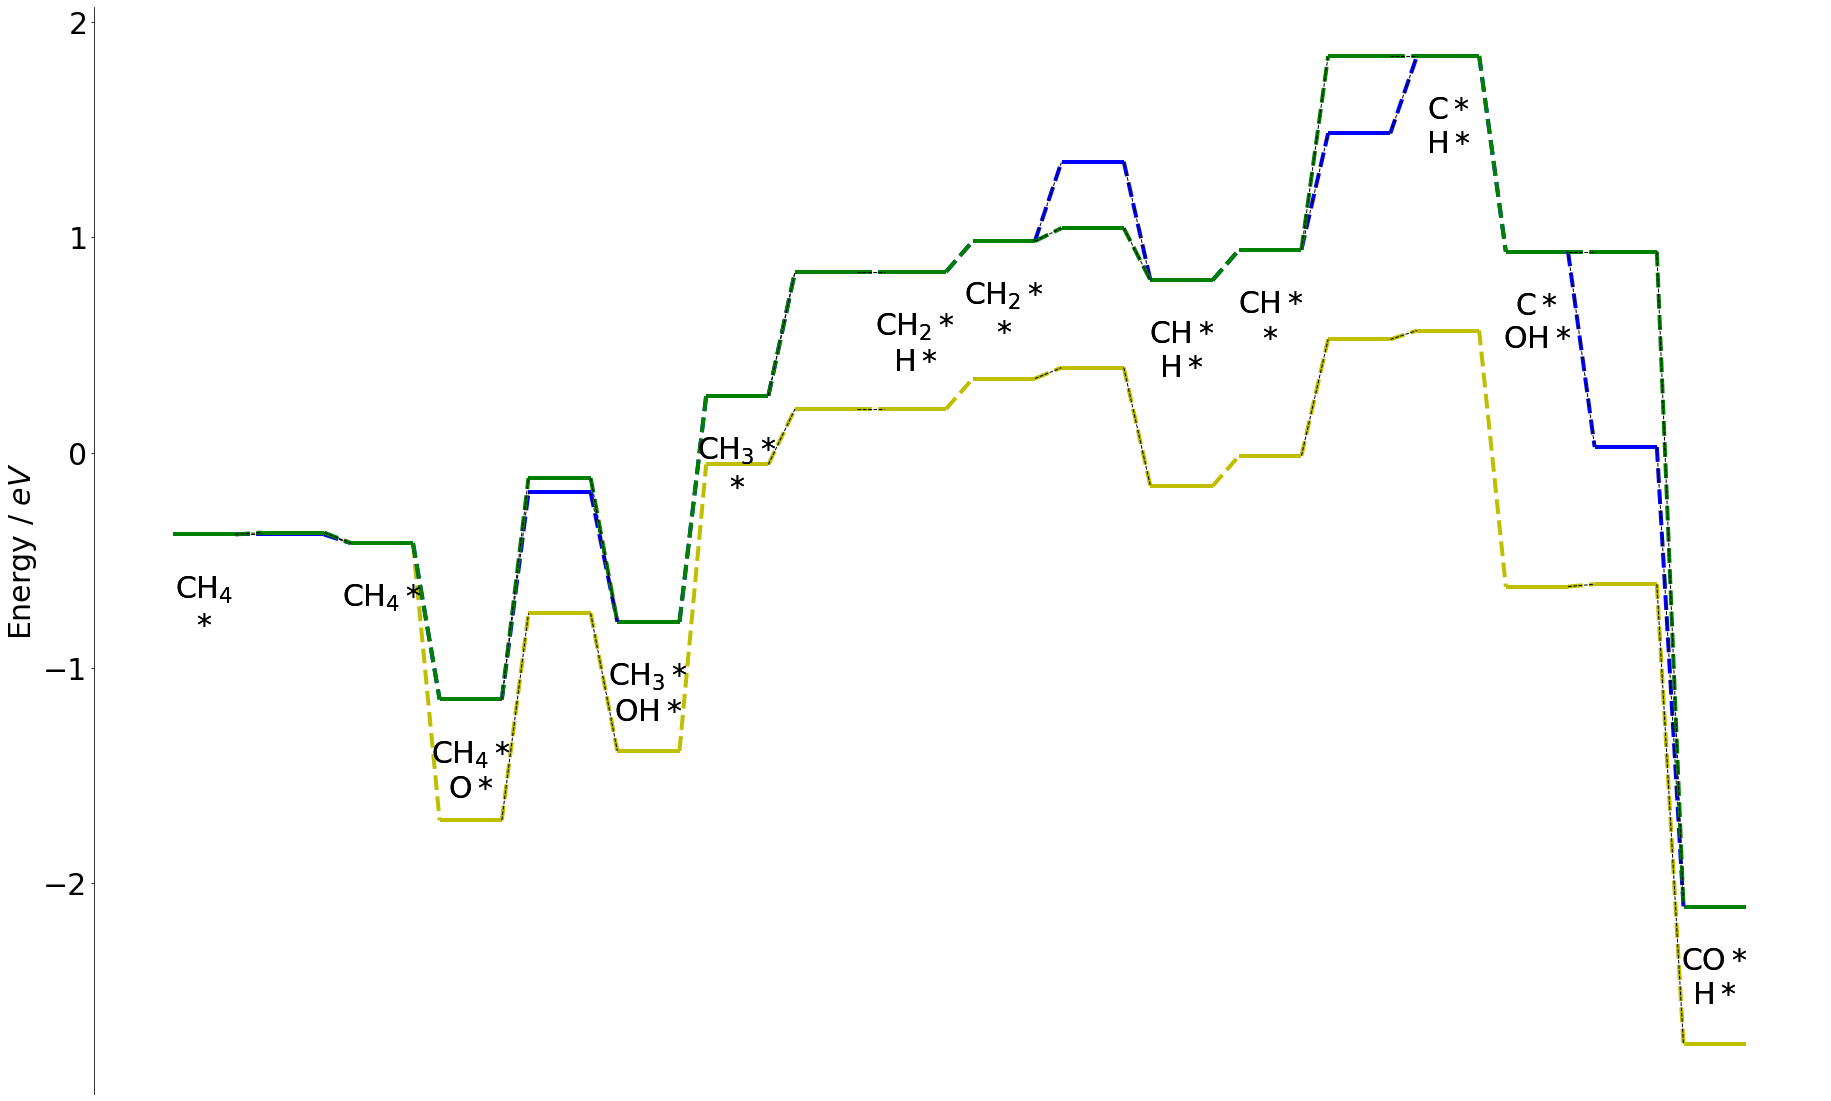

In [4]:
sp_path = [
           [['CH4(2)', 'X(1)'], ['CH4X(24)']],
           [['CH4X(24)', 'OX(25)'], ['CH3X(27)', 'OHX(31)']],
           [['CH3X(27)', 'X(1)'], ['CH2X(26)', 'HX(21)']],
           [['CH2X(26)', 'X(1)'], ['CHX(28)', 'HX(21)']],
           [['CHX(28)', 'X(1)'], ['CX(29)', 'HX(21)']],
           [['CX(29)', 'OHX(31)'], ['COX(23)', 'HX(21)']],
          ]


def search_rxn(reactants, products, rxn_list):
    for i, rxn in enumerate(rxn_list):
        count = collections.Counter
        if count(reactants) == count(rxn.reactants) and count(products) == count(rxn.products):
            print(i, rxn)
            return i, False
        elif count(reactants) == count(rxn.products) and count(products) == count(rxn.reactants):
            print(i, rxn, 'swapped')
            return i, True
    raise ValueError('not found!')

rxn_path = []
for combo in sp_path:
    rxn_idx, swapped = search_rxn(combo[0], combo[1], pes_plot_1.surf.reactions())
    if type(rxn_idx) == int:
        rxn_path.append((rxn_idx, swapped))
rxn_path

yml_orig = '/home/xu.chao/sketches/cpox_sim/rmg_models_bm/base_original/binding_energies/10.0_c-5.75o-3.25/cantera.yaml'
yml_bm = '/home/xu.chao/sketches/cpox_sim/rmg_models_bm/base_bm/binding_energies/10.0_c-5.75o-3.25/cantera.yaml'
plt.rcParams.update({'font.size': 30})
# yml_orig = '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/81.0_c-7.50o-5.25/cantera.yaml'
# yml_bm = '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_bm/binding_energies/81.0_c-7.50o-5.25/cantera.yaml'
# yml_orig = '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/52.0_c-6.75o-4.75/cantera.yaml'
# yml_bm = '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_bm/binding_energies/52.0_c-6.75o-4.75/cantera.yaml'
yml_pt = '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/base_modified_pt.yaml'
models = []
for f_path in [yml_pt,yml_orig, yml_bm]:
    gas = ct.Solution(f_path, 'gas')
    surf = ct.Interface(f_path, 'surface1', [gas])
    surf.TP= 1000, ct.one_atm
    gas.TP = 1000, ct.one_atm
    models.append([gas, surf])
pes_plot.plot_multi_mech(
    models, 
    rxn_path,
    width=40, 
    height=20,
    offset=None,
    dimension=None,
    space=None,
    level_linewidth=4,
    link_linewidth=4
    )
plt.savefig('energy_diagram.png', bbox_inches='tight')

##